In [2]:
#-----------------------------------#
# Target: Calculate ROC curve, PERS, and drought frequency
# DATA: predicted appended IMFS and smapi within Huai river basin 
# author: X.W.
# 7-11-2022
#-----------------------------------#
import xarray as xr
import pandas as pd
#import geopandas as gpd
import numpy as np
import os
import glob
from tqdm.notebook import tqdm
import pylab as plt

In [3]:
# 读取文件名的函数
def read_file(path, file_type):  # path 是指需要提取的文件夹所在路径;file_type是指文件的拓展名;txt格式的文件则输入‘.txt’
    filenames = os.listdir(path)
    filenames1 = []
    for filename in filenames:
        if os.path.splitext(filename)[1] == file_type:
            filenames1.append(filename)
    return filenames1

In [4]:
dir_path = r'E:\Data_inputs\fost_appended_outputs_v1'
os.chdir(dir_path)
curr_path = os.getcwd()  # 获取当前路径
fct_files = read_file(curr_path, '.nc')  # 利用上述函数获取当前文件夹内的.nc文件名
fct_files

['Appended_predicted_imfs_0_from_Mar2019_to_Dec2020.nc',
 'Appended_predicted_imfs_1_from_Mar2019_to_Dec2020.nc',
 'Appended_predicted_imfs_2_from_Mar2019_to_Dec2020.nc',
 'Appended_predicted_imfs_3_from_Mar2019_to_Dec2020.nc',
 'Appended_predicted_imfs_4_from_Mar2019_to_Dec2020.nc',
 'Appended_predicted_imfs_5_from_Mar2019_to_Dec2020.nc',
 'Appended_predicted_imfs_6_from_Mar2019_to_Dec2020.nc',
 'Appended_predicted_imfs_7_from_Mar2019_to_Dec2020.nc',
 'smapi_aggregated_from_IMFs_from_Mar2019_to_Dec2020.nc']

In [5]:
smi_imf = xr.open_dataset(fct_files[-1])
smi_smi = xr.open_dataset(fct_files[-2])
# dt_imf = smi_imf['smapi'].values[:-4,:,:]
# dt_smi = smi_smi['imf'].values[:-4,:,:]

In [6]:
os.chdir(r'E:\Data_inputs\masked_data_HRB')  # 更改工作路径
curr_path = os.getcwd()  # 获取当前路径
files = read_file(curr_path, '.nc')  # 利用上述函数获取当前文件夹内的.nc文件名
# 最后一个文件是smapi，注意区分
smi_val = xr.open_dataset(files[-1])
#dt = data['imf'].values
#df = pd.DataFrame(dt.reshape((dt.shape[0],-1)))
# id_nan = df[df.columns[df.isnull().any()]].columns

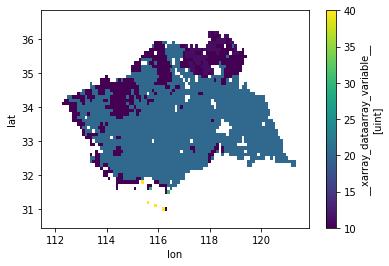

In [7]:
# extract various land cover pixels
# crop: 10/11/12 20 30 40
# forest: 50, 60/61/62, 70/71/72, 80/81/82, 90, 100, 160, 170
# grassland: 110, 130
# load land cover map
lc = xr.open_dataset(r'E:\mask_info\HRB_ecmwf_Land_Cover_map_001degree.nc')
lc_idx = lc.__xarray_dataarray_variable__.values
# show all the pixels covered with crop
lc.__xarray_dataarray_variable__.where((lc_idx>=10) & (lc_idx<=40)).plot()
#lc_hrb.where(~np.isnan(mask.mask.values))

In [8]:
np.unique(lc_idx)

array([ 10.,  11.,  20.,  30.,  40.,  50.,  61.,  70., 100., 180., 190.,
       210.,  nan])

In [9]:
crop_imf = smi_imf['smapi'].where((lc_idx>=10) & (lc_idx<=40))[:-4,:,:]
crop_smi = smi_smi['imf'].where((lc_idx>=10) & (lc_idx<=40))[:-4,:,:]
crop_val = smi_val['smapi'].where((lc_idx>=10) & (lc_idx<=40))[2043:-1]
#forest = smi_imf['smapi'].where((lc_idx>=50) & (lc_idx<=170))[:-4,:,:]

In [10]:
forest_imf = smi_imf['smapi'].where((lc_idx>=50) & (lc_idx<=100))[:-4,:,:]
forest_smi = smi_smi['imf'].where((lc_idx>=50) & (lc_idx<=100))[:-4,:,:]
forest_val = smi_val['smapi'].where((lc_idx>=50) & (lc_idx<=100))[2043:-1]

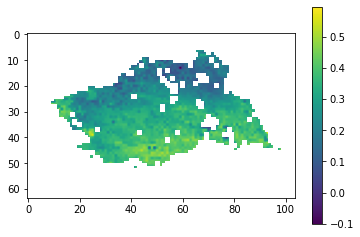

In [11]:
med_map = crop_imf[0,:,:]
plt.imshow(med_map)
plt.colorbar()

<AxesSubplot:>

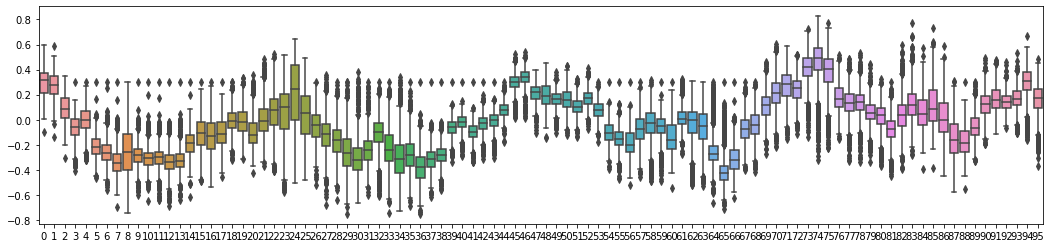

In [12]:
import seaborn as sns
s = crop_imf.values
data = pd.DataFrame(s.reshape(s.shape[0],-1))
df = data.iloc[2:5,:]
#df.T.boxplot()
fig = plt.figure(figsize=(18, 4))
sns.boxplot(data=data.T)

In [13]:
fig = plt.figure(figsize = [18,15])
plt.subplots_adjust(wspace=0.025,hspace=0.1)
fig_1 = np.arange(1,14,3)
fig_2 = np.arange(2,15,3)
fig_3 = np.arange(3,16,3)
label_1 = ['(a) accuracy','(d) FAR', '(g) MR','(j) ER','(m) POD']
label_2 = ['(b) accuracy','(e) FAR', '(h) MR','(k) ER','(n) POD']
label_3 = ['(c) accuracy','(f) FAR', '(i) MR','(l) ER','(o) POD']
idx1 = L1_ctg_idx1
idx2 = L2_ctg_idx1
idx3 = L3_ctg_idx1
subtitle = ['Mild drought','Moderate drought','Severe drought']
for ii in range(5):
    index = xr.DataArray(data = idx1[:,:,ii], 
                         dims = {'x','y'},
                         coords={'y':lon,'x':lat})
#     index = xr.DataArray(data = idx1[:,:,ii], 
#                          coords={'lati':lat,
#                                  'long':lon},
#                          dims = {'lati','long'})
    figaxi = fig.add_subplot(1,3,fig_1[ii], projection = ccrs.PlateCarree())
    figaxi.add_feature(ctp.feature.LAND, edgecolor='black', zorder = 0,lw = 0.2, facecolor = 'lightgrey')
    figaxi.add_feature(ctp.feature.OCEAN, zorder = 0, facecolor = 'royalblue')
    figaxi.coastlines(zorder=0, lw= 0.8)
    figtmp = index.plot(ax = figaxi,
                        transform = ccrs.PlateCarree(),
                        add_colorbar = False,
                        cmap = 'jet',
                        vmax = 1,
                        vmin = 0,)
    figaxi.set_aspect('equal')
    plt.colorbar(figtmp,fraction=0.026, pad=0.04)
    plt.plot(x,y,'k')
    gl=figaxi.gridlines(draw_labels=True,linestyle=":",linewidth=0.5,color='k')
    gl.top_labels=False #关闭上部经纬标签                                  
    gl.right_labels=False
    gl.ylocator = ticker.FixedLocator(np.arange(31,37.5,1))
    gl.xformatter = LONGITUDE_FORMATTER  #使横坐标转化为经纬度格式            
    gl.yformatter = LATITUDE_FORMATTER  
    plt.axis([111.8,121.5,30.8,36.4])
    plt.tight_layout()
    figaxi.text(112, 35.85, label_1[ii],fontsize = 14)
    if ii ==0:
        plt.title(subtitle[0],fontsize = 16, weight='bold')
    #----------------------------------------------------------------#
    #----------------------------------------------------------------#

NameError: name 'L1_ctg_idx1' is not defined

<Figure size 1296x1080 with 0 Axes>

In [15]:
def drought_occur_freq(smi):
    dry_occur = np.where(smi > -0.05, 0, smi)
    dry_occur = np.where(dry_occur <= -0.05, 1, dry_occur)
    freq_drought = np.zeros(dry_occur.shape[0])
    for ii in range(dry_occur.shape[0]):
        event = np.count_nonzero(dry_occur[ii,:,:] >= 0)
        count = np.count_nonzero(dry_occur[ii,:,:])
        freq_drought[ii] = event/count * 100
    return freq_drought

In [16]:
freq_crop_imf = drought_occur_freq(crop_imf.values)
freq_crop_smi = drought_occur_freq(crop_smi.values)
freq_crop_val = drought_occur_freq(crop_val.values)
# ts_freq_forest = drought_occur_freq(forest.values)

In [17]:
freq_forest_imf = drought_occur_freq(forest_imf.values)
freq_forest_smi = drought_occur_freq(forest_smi.values)
freq_forest_val = drought_occur_freq(forest_val.values)
# ts_freq_forest = drought_occur_freq(forest.values)

In [22]:
np.count_nonzero(~np.isnan(forest_imf.data[1,:,:]))

128

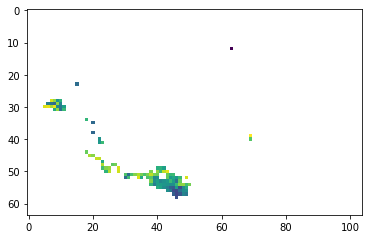

In [23]:
plt.imshow(forest_imf[1,:,:])

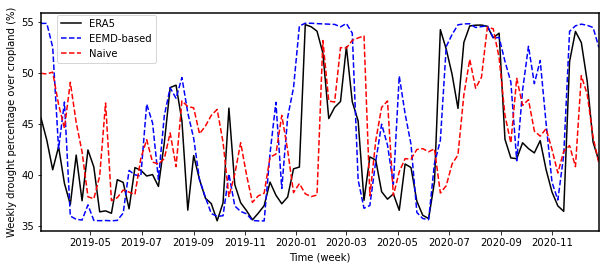

In [54]:
fig = plt.figure(figsize=(10, 4))
plt.rcParams['axes.linewidth'] = 1.5
date = smi_smi.time[:-4]
plt.plot(date, freq_crop_val,'k')
plt.plot(date, freq_crop_imf,'--b')
plt.plot(date, freq_crop_smi,'--r')
#plt.xticks(np.arange(0.00000,0.00013,step=0.000008))
plt.xlabel('Time (week)')
plt.ylabel('Weekly drought percentage over cropland (%)')
plt.yticks(np.arange(35,60,step=5))
plt.xlim([date[0], date[-1]])
plt.legend(['ERA5','EEMD-based','Naive'],bbox_to_anchor=(0.02, 0.75, 1., .102))
#plt.plot(smi_smi.time[:-4], ts_freq_forest,'k')
plt.savefig(r'E:\jupyter_output_figs\metrics_self2eemd\Weely drought percentage over cropland.png',
           bbox_inches = 'tight',
           pad_inches = 0.05,
           dpi = 600)

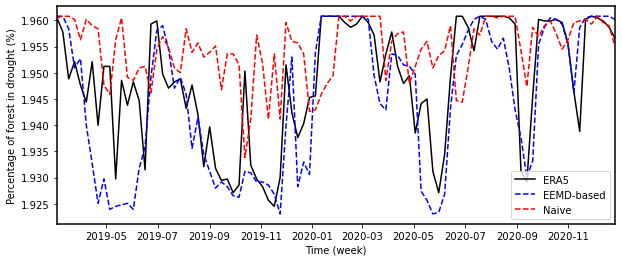

In [55]:
fig = plt.figure(figsize=(10, 4))
plt.rcParams['axes.linewidth'] = 1.5
date = smi_smi.time[:-4]
plt.plot(date, freq_forest_val,'k')
plt.plot(date, freq_forest_imf,'--b')
plt.plot(date, freq_forest_smi,'--r')
#plt.xticks(np.arange(0.00000,0.00013,step=0.000008))
plt.xlabel('Time (week)')
plt.ylabel('Percentage of forest in drought (%)')
#plt.yticks(np.arange(0.35,0.55,step=0.05))
plt.xlim([date[0], date[-1]])
plt.legend(['ERA5','EEMD-based','Naive'],loc='lower right')#,bbox_to_anchor=(0.02, 0.75, 1., .102))
#plt.plot(smi_smi.time[:-4], ts_freq_forest,'k')
plt.savefig(r'E:\jupyter_output_figs\metrics_self2eemd\Weely drought percentage over forest.png',
           bbox_inches = 'tight',
           pad_inches = 0.05,
           dpi = 600)

In [86]:
# plot ROC curve
def roc_xy(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
    try:
        #miss = FN/(TN+FP)
        TPR = TP/(TP+FN)
        FPR = FP/(TN+FP)
    except ZeroDivisionError:
        #miss = 0
        TPR = np.nan
        FPR = np.nan
    return TPR, FPR

In [131]:
def smi_levels(dt_val, dt_fct):
    std = np.array([-0.5, -0.3, -0.15, -0.05, 0.05, 0.15, 0.3, 0.5])
    tpr_list = []
    fpr_list = []
    for i in tqdm(range(len(std))):
        # 将低于阈值的像元设置为1，其他设置为0
        med_val = np.where(dt_val >= std[i], 0, 1)
        med_val = np.where(np.isnan(dt_val), np.nan, med_val)
        med_fct = np.where(dt_fct >= std[i], 0, 1)
        med_fct = np.where(np.isnan(dt_fct), np.nan, med_fct)
        [med_tpr, med_fpr] = roc_xy(med_val.flatten(),med_fct.flatten())
        tpr_list.append(med_tpr)
        fpr_list.append(med_fpr)
    return tpr_list, fpr_list
    #print(dicts)

In [133]:
imf_tpr, imf_fpr = smi_levels(crop_val, crop_imf)
smi_tpr, smi_fpr = smi_levels(crop_val, crop_smi)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

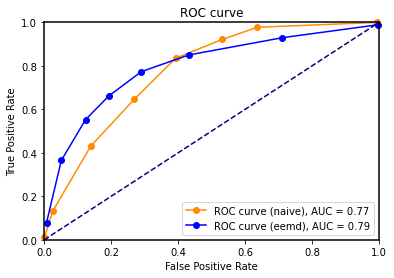

In [157]:
TPR = smi_tpr
FPR = smi_fpr
auc_smi = np.trapz(TPR,FPR)
auc_imf = np.trapz(imf_tpr,imf_fpr)
plt.plot(FPR, TPR, marker='o', color='darkorange', label='ROC curve (naive), AUC = %.2f'%auc_smi, clip_on=False)
plt.plot(imf_fpr,imf_tpr, marker='o', color='b', label='ROC curve (eemd), AUC = %.2f'%auc_imf, clip_on=False)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.savefig('AUC_example.png')
plt.show()

In [1]:
# create boxplot for drought analysis

    

SyntaxError: invalid syntax (1860959373.py, line 2)

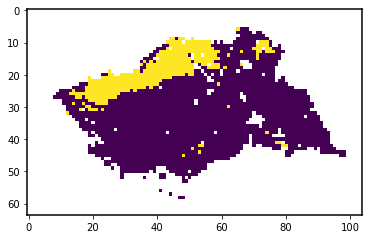

In [43]:
a = np.where((dt > -0.05) | (dt <= -0.15), 0, 1)
a = np.where(np.isnan(dt), np.nan, a)
#plt.imshow(a[1,:,:])
#a[np.isnan(crop_smi)] = np.nan

In [40]:
a[np.isnan(crop_smi)] = np.nan

ValueError: cannot convert float NaN to integer

In [16]:
def class_smapi(smi):
    # 对干旱指标进行分级
    # 低于-0.05即出现干旱情形
    # 低于-0.15即出现中度干旱
    # 低于-0.3即出现重度干旱
    smi_mild = np.where((smi > -0.05) | (smi <= -0.15), 0, smi)
    smi_mild = np.where((smi_mild <= -0.05) & (smi_mild > -0.15), 1, smi_mild)

    smi_moderate = np.where((smi > -0.15) | (smi <= -0.3), 0, smi)
    smi_moderate = np.where((smi_moderate <= -0.15) & (smi_moderate > -0.3), 1, smi_moderate)

    smi_severe = np.where(smi > -0.3, 0, smi)
    smi_severe = np.where(smi_severe <= -0.3, 1, smi_severe)
    
    return smi_mild, smi_moderate, smi_severe

In [20]:
imf_L1, imf_L2, imf_L3 = class_smapi(crop_imf.values.flatten())
val_L1, val_L2, val_L3 = class_smapi(crop_val.values.flatten())

In [24]:
tpr_L1, fpr_L1 = roc_xy(imf_L1,val_L1)
tpr_L2, fpr_L2 = roc_xy(imf_L2,val_L2)
tpr_L3, fpr_L3 = roc_xy(imf_L3,val_L3)

In [25]:
fpr =  np.array([fpr_L1, fpr_L2, fpr_L3])
tpr =  np.array([tpr_L1, tpr_L2, tpr_L3])

In [180]:
def temporal_freq(dt):
    freq_surf = np.empty_like(dt[0,:,:])*np.nan
    for ii in range(freq_surf.shape[0]):
        for jj in range(freq_surf.shape[1]):
            med_ts = ft[:,ii,jj]
            freq_surf[ii,jj] = np.bincount(med_ts)[1]
    return freq_surf

In [189]:
med_ts = crop_imf.values[35,26]
count = (med_ts < -0.2).sum(axis=0)


41

In [ ]:
# create spatial drought frequency


In [257]:
def freq_area_class(dt):
    np.seterr(divide='ignore', invalid='ignore')
    count_sum = (~np.isnan(dt)).sum(axis=0)
    count_L1 = ((dt<-0.05) & (dt >= -0.15)).sum(axis=0)
    count_L2 = ((dt<-0.15) & (dt >= -0.3)).sum(axis=0)
    count_L3 = (dt<-0.3).sum(axis=0)
    freq_L1 = count_L1/count_sum*100
    freq_L2 = count_L2/count_sum*100
    freq_L3 = count_L3/count_sum*100

    freq_map = np.stack((freq_L1,freq_L2,freq_L3), axis=2)
    return freq_map

In [260]:
freq_map_imf = freq_area_class(crop_imf.values)
freq_map_smi = freq_area_class(crop_smi.values)
freq_map_val = freq_area_class(crop_val.values)

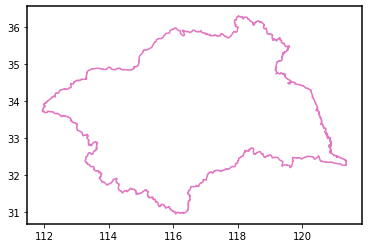

In [262]:
import shapefile
#sf = shapefile.Reader(r'C:\Users\Xiaoyi Wang\Documents\WeChat Files\wxid_brbhsoiwov5q21\FileStorage\MsgAttach\e1af2439ac51d5b33a9a4b5a39835f37\File\2022-06\huaibeiPlain.zip')
sf = shapefile.Reader(r'E:\shp\Huai_Edge\HRB_edge_polygon.shp')
sf.shapeType == shapefile.POLYGON
plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)

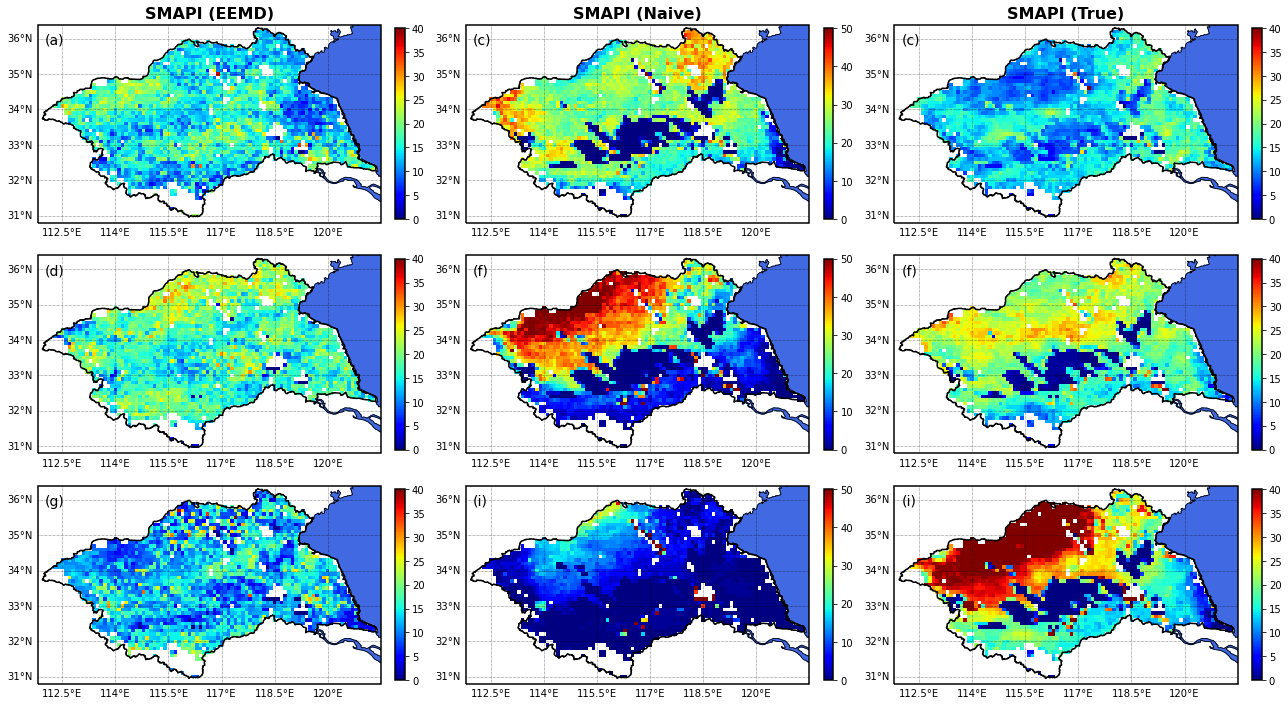

In [276]:
import matplotlib.ticker as ticker
import cartopy.crs as ccrs
import cartopy as ctp
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
lat = smi_imf.lat.values[:,0]
lon = smi_imf.lon.values[0,:]


fig = plt.figure(figsize = [18,10])
plt.subplots_adjust(wspace=0.025,hspace=0.1)
fig_L = np.array([1,4,7])
fig_M = np.array([2,5,8])
fig_R = np.array([3,6,9])
y_label = [' Mild drought','Moderate drought','Severe drought']
label_L = ['(a)','(d)', '(g)']
label_M = ['(b)','(e)', '(h)']
label_R = ['(c)','(f)', '(i)']

for ii in range(3):
    index = xr.DataArray(data = freq_map_imf[:,:,ii], 
                         dims = {'x','y'},
                         coords={'y':lon,'x':lat})
    figaxi = fig.add_subplot(3,3,fig_L[ii], projection = ccrs.PlateCarree())
    figaxi.add_feature(ctp.feature.LAND, edgecolor='black', zorder = 0,lw = 0.2, facecolor = 'w')
    figaxi.add_feature(ctp.feature.OCEAN, zorder = 0, facecolor = 'royalblue')
    figaxi.coastlines(zorder=0, lw= 0.8)
    figtmp = index.plot(ax = figaxi,
                        transform = ccrs.PlateCarree(),
                        add_colorbar = False,
                        cmap = 'jet',
                        vmax = 40,
                        vmin = 0,)
    figaxi.set_aspect('equal')
    plt.colorbar(figtmp,fraction=0.026, pad=0.04)
    plt.ylabel(y_label[ii])
    plt.plot(x,y,'k')
    gl=figaxi.gridlines(draw_labels=True,linestyle=":",linewidth=0.5,color='k')
    gl.top_labels=False #关闭上部经纬标签                                  
    gl.right_labels=False
    gl.ylocator = ticker.FixedLocator(np.arange(31,37.5,1))
    gl.xformatter = LONGITUDE_FORMATTER  #使横坐标转化为经纬度格式            
    gl.yformatter = LATITUDE_FORMATTER  
    plt.axis([111.8,121.5,30.8,36.4])
    plt.tight_layout()
    
    figaxi.text(112, 35.85, label_L[ii],fontsize = 14)
    if ii ==0:
        plt.title('SMAPI (EEMD)',fontsize = 16, weight='bold')
    #----------------------------------------------------------------#
    #----------------------------------------------------------------#
#     index = xr.DataArray(data = basic_idx2[ii,:,:], 
#                          coords={'lati':lat,
#                                  'long':lon},
#                          dims = {'lati','long'})
    index = xr.DataArray(data = freq_map_smi[:,:,ii], 
                         dims = {'x','y'},
                         coords={'y':lon,'x':lat})
    figaxi = fig.add_subplot(3,3,fig_M[ii], projection = ccrs.PlateCarree())
    figaxi.add_feature(ctp.feature.LAND, edgecolor='black', zorder = 0,lw = 0.2, facecolor = 'w')#'lightgrey')
    figaxi.add_feature(ctp.feature.OCEAN, zorder = 0, facecolor = 'royalblue')
    figaxi.coastlines(zorder=0, lw= 0.8)
    figtmp = index.plot(ax = figaxi,
                        transform = ccrs.PlateCarree(),
                        add_colorbar = False,
                        cmap = 'jet',
                        vmax = 50,
                        vmin = 0,)
                       #levels = [0,0.2,0.4,0.6,0.8,1])
    figaxi.set_aspect('equal')
    figaxi.text(112, 35.85, label_R[ii],fontsize = 14)
    gl=figaxi.gridlines(draw_labels=True,linestyle=":",linewidth=0.5,color='k')
    gl.top_labels=False #关闭上部经纬标签                                  
    gl.right_labels=False
    gl.ylocator = ticker.FixedLocator(np.arange(31,37.5,1))
    gl.xformatter = LONGITUDE_FORMATTER  #使横坐标转化为经纬度格式            
    gl.yformatter = LATITUDE_FORMATTER  
    plt.axis([111.8,121.5,30.8,36.4])
    plt.colorbar(figtmp,fraction=0.026, pad=0.04)
    plt.plot(x,y,'k')
    plt.tight_layout()
    if ii ==0:
        plt.title('SMAPI (Naive)',fontsize = 16, weight='bold')
        #----------------------------------------------------------------#
    #----------------------------------------------------------------#
#     index = xr.DataArray(data = basic_idx2[ii,:,:], 
#                          coords={'lati':lat,
#                                  'long':lon},
#                          dims = {'lati','long'})
    index = xr.DataArray(data = freq_map_val[:,:,ii], 
                         dims = {'x','y'},
                         coords={'y':lon,'x':lat})
    figaxi = fig.add_subplot(3,3,fig_R[ii], projection = ccrs.PlateCarree())
    figaxi.add_feature(ctp.feature.LAND, edgecolor='black', zorder = 0,lw = 0.2, facecolor = 'w')
    figaxi.add_feature(ctp.feature.OCEAN, zorder = 0, facecolor = 'royalblue')
    figaxi.coastlines(zorder=0, lw= 0.8)
    figtmp = index.plot(ax = figaxi,
                        transform = ccrs.PlateCarree(),
                        add_colorbar = False,
                        cmap = 'jet',
                        vmax = 40,
                        vmin = 0,)
                       #levels = [0,0.2,0.4,0.6,0.8,1])
    figaxi.set_aspect('equal')
    figaxi.text(112, 35.85, label_R[ii],fontsize = 14)
    gl=figaxi.gridlines(draw_labels=True,linestyle=":",linewidth=0.5,color='k')
    gl.top_labels=False #关闭上部经纬标签                                  
    gl.right_labels=False
    gl.ylocator = ticker.FixedLocator(np.arange(31,37.5,1))
    gl.xformatter = LONGITUDE_FORMATTER  #使横坐标转化为经纬度格式            
    gl.yformatter = LATITUDE_FORMATTER  
    plt.axis([111.8,121.5,30.8,36.4])
    plt.colorbar(figtmp,fraction=0.026, pad=0.04)
    plt.plot(x,y,'k')
    plt.tight_layout()
    if ii ==0:
        plt.title('SMAPI (True)',fontsize = 16, weight='bold')
# plt.savefig(r'E:\jupyter_output_figs\metrics_self2eemd\basic_metrics_HRB.png',
#            bbox_inches = 'tight',
#            pad_inches = 0.05,
#            dpi = 600)
# ax1 = fig.add_subplot(3,2,1)
# ax1.text(111.8,121.5,'asd')
#figaxi.text(112, 35.85, label_R[ii],fontsize = 14)
# fig.subplots_adjust(bottom=0.15)
# cbar_ax = fig.add_axes([0.14, 0.25, 0.75, 0.03])
# fig.colorbar(figtmp, cax=cbar_ax, orientation = 'horizontal')

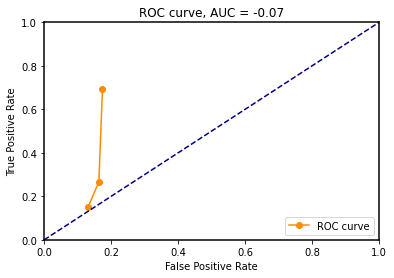

In [26]:
plt.plot(fpr, tpr, marker='o', color='darkorange', label='ROC curve', clip_on=False)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve, AUC = %.2f'%auc)
plt.legend(loc="lower right")
plt.savefig('AUC_example.png')
plt.show()

In [18]:
T_class = imf_L1
P_class = val_L1
tpr_matrix = np.zeros((crop_imf.values.shape[1:]))*np.nan
fpr_matrix = tpr_matrix.copy()
for ii in tqdm(range(tpr_matrix.shape[0])):
    for jj in range(tpr_matrix.shape[1]):
        med_T = T_class[:,ii,jj]
        med_P = P_class[:,ii,jj]
        tpr_matrix[ii,jj],fpr_matrix[ii,jj] = roc_xy(med_T,med_P)

  0%|          | 0/64 [00:00<?, ?it/s]

In [ ]:
# Create weekly variation changes 

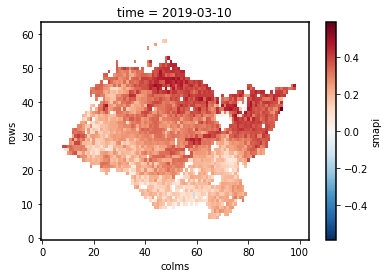

In [20]:
crop_dry.shape

(96, 64, 104)

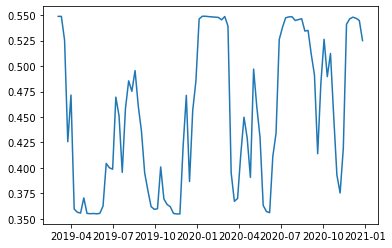

In [29]:
freq_crop = np.zeros(crop_dry.shape[0])
for ii in range(crop_dry.shape[0]):
    event = np.count_nonzero(crop_dry[ii,:,:] >= 0)
    count = np.count_nonzero(crop_dry[ii,:,:])
    freq_crop[ii] = event/count
plt.plot(smi_imf.time[:-4], freq_crop)


In [27]:
np.zeros(crop_dry.shape[0])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

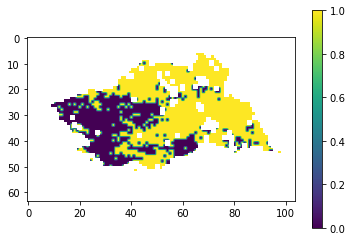

In [19]:
plt.imshow(crop_dry[15,:,:])
plt.colorbar()

In [ ]:
def drought_class(smi):
    smi_class = smi.copy()
    smi_class[smi >= 0.3] = 3
    smi_class[(smi >= 0.15) & (smi < 0.3)] = 2
    smi_class[(smi >= 0.05) & (smi < 0.15)] = 1
    smi_class[(smi > -0.05) & (smi <= 0.05)] = 0
    smi_class[(smi > -0.15) & (smi <= -0.05)] = -1
    smi_class[(smi > -0.3) & (smi <= -0.15)] = -2
    smi_class[smi <= -0.3] = -3

In [12]:
def class_smi(smi):
    # 对干旱指标进行分级
    # 低于-0.05即出现干旱情形
    # 低于-0.15即出现中度干旱
    # 低于-0.3即出现重度干旱
    smi_mild = np.where((smi > -0.05) | (smi <= -0.15), 0, smi)
    smi_mild = np.where((smi_mild <= -0.05) & (smi_mild > -0.15), 1, smi_mild)

    smi_moderate = np.where((smi > -0.15) | (smi <= -0.3), 0, smi)
    smi_moderate = np.where((smi_moderate <= -0.15) & (smi_moderate > -0.3), 1, smi_moderate)

    smi_severe = np.where(smi > -0.3, 0, smi)
    smi_severe = np.where(smi_severe <= -0.3, 1, smi_severe)
    
    return smi_mild, smi_moderate, smi_severe

<xarray.DataArray 'smapi' (time: 96, rows: 64, colms: 104)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-03 2019-03-10 ... 2020-12-27
    lon      (rows, colms) float32 ...
    lat      (rows, colms) float32 ...
Dimensions without coordinates: rows, colms

In [7]:
crop_imf = smi_imf['smapi'].where((lc_idx>=10) & (lc_idx<=40))[:-4,:,:]
crop_smi = smi_smi['imf'].where((lc_idx>=10) & (lc_idx<=40))[:-4,:,:]
crop_val = smi_val['smapi'].where((lc_idx>=10) & (lc_idx<=40))[2043:-1]



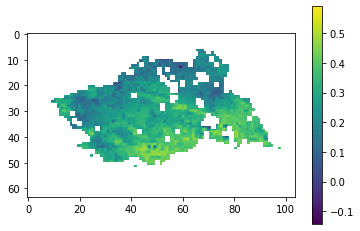

In [12]:
plt.imshow(crop_imf[1,:,:].values)
plt.colorbar()

In [55]:
def pers(p,t):
    pers_collect = np.zeros([p.shape[1],p.shape[2],4])*np.nan
    for ii in tqdm(range(p.shape[1])):
        for jj in range(p.shape[2]):
            med_p = p[:,ii,jj]
            med_t = t[:,ii,jj]
            if np.isnan(med_t).all() == True:
                pers_collect[ii,jj,:] = np.nan
                #continue
            else:
                sse = np.nansum((med_p-med_t)**2)
                for kk in range(4):
                    lt = kk+1
                    sse_naive = np.nansum((med_t[lt:]-med_t[:-lt])**2)
                    pers_collect[ii,jj,kk] = 1-sse/sse_naive
    return pers_collect

In [89]:
pers_imf = pers(crop_imf.values, crop_val.values)
pers_smi = pers(crop_smi.values, crop_val.values)

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

In [ ]:
# plot PERS (left)

In [16]:
def class_smapi(smi):
    # 对干旱指标进行分级
    # 低于-0.05即出现干旱情形
    # 低于-0.15即出现中度干旱
    # 低于-0.3即出现重度干旱
    smi_mild = np.where((smi > -0.05) | (smi <= -0.15), 0, smi)
    smi_mild = np.where((smi_mild <= -0.05) & (smi_mild > -0.15), 1, smi_mild)

    smi_moderate = np.where((smi > -0.15) | (smi <= -0.3), 0, smi)
    smi_moderate = np.where((smi_moderate <= -0.15) & (smi_moderate > -0.3), 1, smi_moderate)

    smi_severe = np.where(smi > -0.3, 0, smi)
    smi_severe = np.where(smi_severe <= -0.3, 1, smi_severe)
    
    return smi_mild, smi_moderate, smi_severe

In [34]:
indexes = ~np.isnan(crop_val.values)
crop_imf_dropna = crop_imf.values[indexes]
crop_smi_dropna = crop_smi.values[indexes]
crop_val_dropna = crop_val.values[indexes]

In [35]:
val_L1, val_L2, val_L3 = class_smapi(crop_val_dropna)
imf_L1, imf_L2, imf_L3 = class_smapi(crop_imf_dropna)
smi_L1, smi_L2, smi_L3 = class_smapi(crop_smi_dropna)

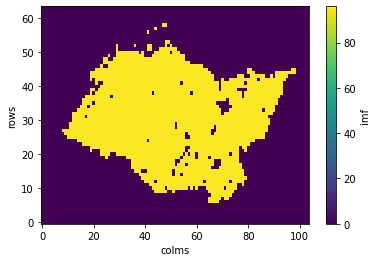

In [49]:
crop_smi.count(dim='time').plot()

In [36]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    return TPR, FPR

In [ ]:
def roc_curve(val,imf):
    

In [37]:
[tpr1,fpr1] = perf_measure(val_L1,imf_L1)
[tpr2,fpr2] = perf_measure(val_L2,imf_L2)
[tpr3,fpr3] = perf_measure(val_L3,imf_L3)

In [44]:
import xskillscore as xs
#category_edges = np.linspace(-2, 2, 5)

t = xr.DataArray(val_L1,
                 coords=[('time', np.arange(226464))])
f = xr.DataArray(imf_L1,
                 coords=[('time', np.arange(226464))])
xs.roc(t, f, dim=['time'])#, #category_edges)

<xarray.DataArray 'histogram_observations_forecasts' ()>
array(0.51045616)

In [46]:
# compute ROC curve over cropland
from sklearn.metrics import roc_curve
roc_curve(val_L1,imf_L1)

(array([0.        , 0.14530355, 1.        ]),
 array([0.        , 0.16621586, 1.        ]),
 array([2., 1., 0.]))

In [76]:
med_t-med_t[:-lt]

ValueError: operands could not be broadcast together with shapes (96,) (95,) 

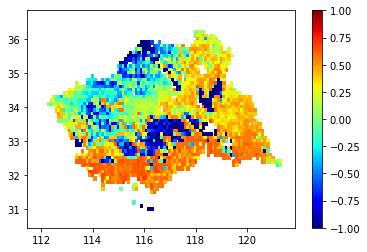

In [88]:
X = smi_smi.lon.values
Y = smi_smi.lat.values
plt.pcolor(X, Y, pers_imf[:,:,1], cmap='jet', vmin=-1, vmax=1)
plt.colorbar()

In [73]:
p = crop_imf.values
t = crop_val.values
ii = 38
jj = 79
med_p = p[:,ii,jj]
med_t = t[:,ii,jj]
lt = 1
sse = np.nansum((med_p-med_t)**2)
sse_naive = np.nansum((med_t[lt:]-med_t[:-lt])**2)
1-sse/sse_naive

-29.7188377446906

In [74]:
sse_naive

0.15443229834354283

In [75]:
sse

4.743980715354943

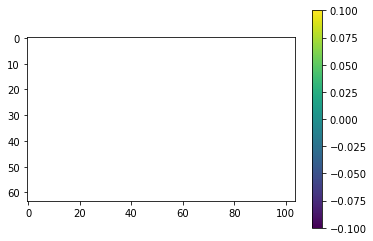

In [18]:
plt.imshow(pers_imf[:,:,1])
plt.colorbar()

In [ ]:
basic_idx1 = np.zeros([4,dt_true.shape[1],dt_true.shape[2]])*np.nan
basic_idx2 = basic_idx1.copy()
from scipy.spatial import distance
for ii in tqdm(range(dt_true.shape[1])):
    for jj in range(dt_true.shape[2]):
        ts_fct1 = dt_imf[:,ii,jj]
        ts_fct2 = dt_self[:,ii,jj]
        ts_val = dt_true[:,ii,jj]
        if np.isnan(ts_val).all() == True:
            basic_idx1[:,ii,jj] = np.nan
            basic_idx2[:,ii,jj] = np.nan
        else:  
            med_idx1 = classical_metrics(ts_fct1,ts_val)
            med_idx2 = classical_metrics(ts_fct2,ts_val)
            for kk in range(4):
                basic_idx1[kk,ii,jj] = med_idx1[kk]
                basic_idx2[kk,ii,jj] = med_idx2[kk]

In [ ]:
xr.apply_ufunc(signal.medfilt, data_smooth, kwargs={"kernel_size": 15}, input_core_dims = [['wave_number']], vectorize=True)

In [ ]:
dt_val = smi_val['smapi'].values
dt_val= dt_val[2043:-1]

In [ ]:
# PERS calculation